In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv("E:\LOAN_PRED_HACK_TRAIN.csv")
df_test = pd.read_csv("E:\LOAN_PRED_HACK_TEST.csv")

In [3]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

In [4]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df_train = df_train.drop(['Loan_ID'],axis=1)
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# from pandas_profiling import ProfileReport
# TrainDataProfile = ProfileReport(df_train,title="Loan Prediction",explorative=True)
# TrainDataProfile

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227EEAC5148>,
      dtype=object)

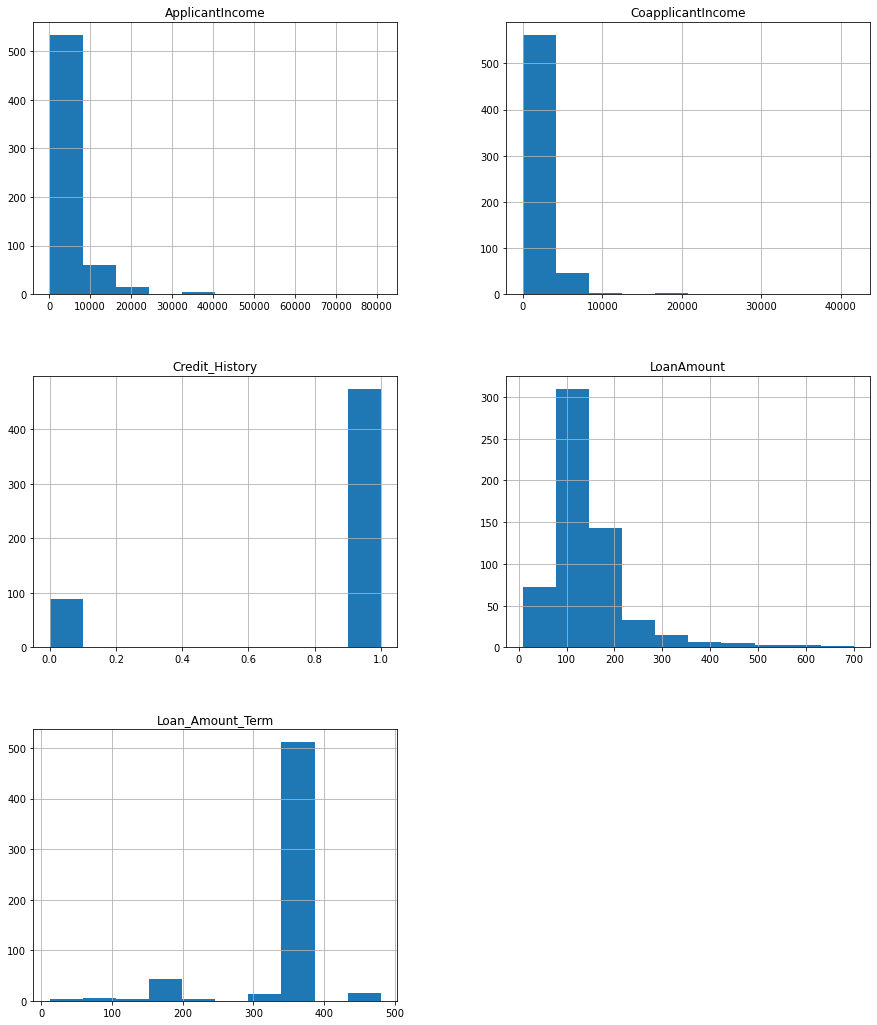

In [8]:
plt.rcParams["figure.figsize"] = 15,18
df_train.hist()

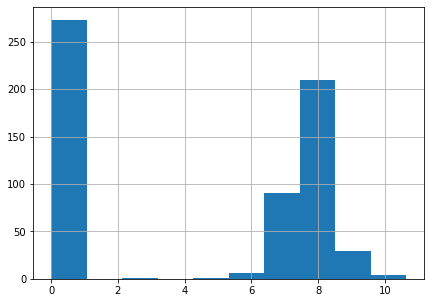

In [9]:
plt.rcParams["figure.figsize"] = 7,5
df_train['CoapplicantIncome'] = np.log1p(df_train['CoapplicantIncome'])
df_train['CoapplicantIncome'].hist()

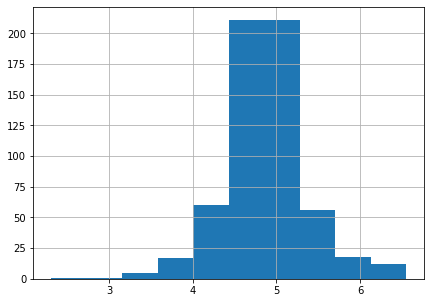

In [10]:
df_train['LoanAmount']= np.log1p(df_train['LoanAmount'])
df_train['LoanAmount'].hist()

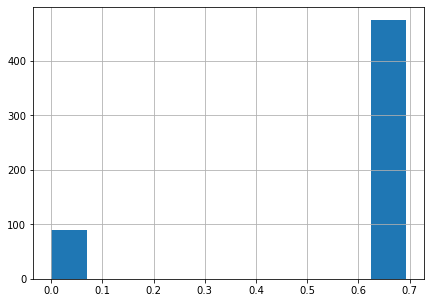

In [11]:
df_train['Credit_History']= np.log1p(df_train['Credit_History'])
df_train['Credit_History'].hist()

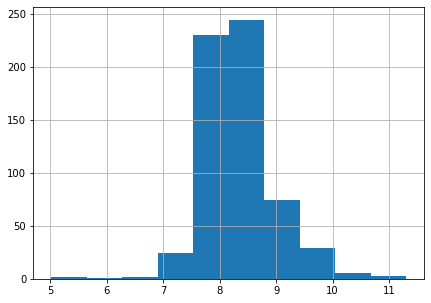

In [12]:
df_train['ApplicantIncome']= np.log1p(df_train['ApplicantIncome'])
df_train['ApplicantIncome'].hist()

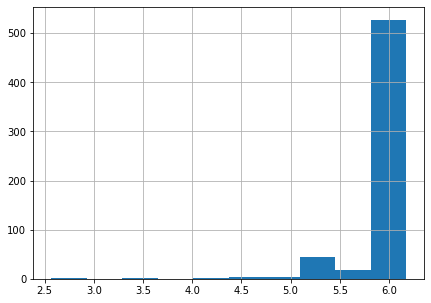

In [13]:
df_train['Loan_Amount_Term']= np.log1p(df_train['Loan_Amount_Term'])
df_train['Loan_Amount_Term'].hist()

In [14]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674197,0.000000,NaN,5.888878,0.693147,Urban,Y
1,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,5.888878,0.693147,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,5.888878,0.693147,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,5.888878,0.693147,Urban,Y
4,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,5.888878,0.693147,Urban,Y


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227F0280848>,
      dtype=object)

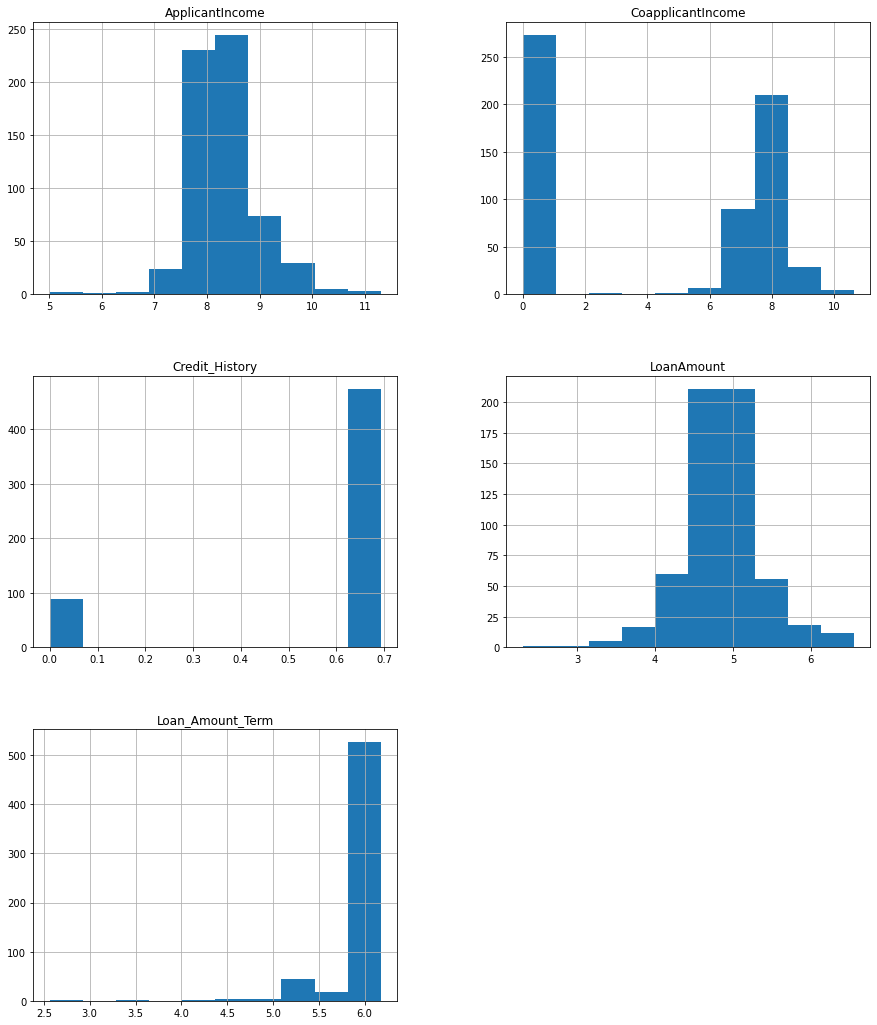

In [15]:
plt.rcParams["figure.figsize"] = 15,18
df_train.hist()

In [16]:
cat_label = [var for var in df_train.columns if df_train[var].dtypes == "object"]
cat_label = df_train[cat_label]
cat_label

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [17]:
df_train['Gender'] = pd.get_dummies(df_train['Gender'])

In [18]:
df_train['Married'] = pd.get_dummies(df_train['Married'])

In [19]:
df_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [20]:
def encode_Education(Education):
    if Education =="Graduate":
        return 1
    else:
        return 0
    
df_train['Education'] = df_train['Education'].apply(encode_Education)

In [21]:
df_train['Self_Employed'] = pd.get_dummies(df_train['Self_Employed'])

In [22]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [23]:
def encode_Property_Area(Property_Area):
    if Property_Area =="Semiurban":
        return 2
    elif Property_Area =="Urban":
        return 1
    elif Property_Area =="Rural":
        return 3
    
df_train['Property_Area'] = df_train['Property_Area'].apply(encode_Property_Area)

In [24]:
def encode_Loan_Status(Loan_Status):
    if Loan_Status =="Y":
        return 1
    else:
        return 0
    
df_train['Loan_Status'] = df_train['Loan_Status'].apply(encode_Loan_Status)

In [32]:
df_train['Dependents'].value_counts()

1.0    345
2.0    102
3.0    101
4.0     51
Name: Dependents, dtype: int64

In [31]:
def encode_Dependents(Dependents):
    if Dependents =='0':
        return 1
    elif Dependents =='1':
        return 2
    elif Dependents =='2':
        return 3
    elif Dependents =='3+':
        return 4
df_train['Dependents'] = df_train['Dependents'].apply(encode_Dependents)

In [33]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1.0,1,1,8.674197,0.000000,NaN,5.888878,0.693147,1,1
1,0,0,2.0,1,1,8.430327,7.319202,4.859812,5.888878,0.693147,3,0
2,0,0,1.0,1,0,8.006701,0.000000,4.204693,5.888878,0.693147,1,1
3,0,0,1.0,0,1,7.857094,7.765993,4.795791,5.888878,0.693147,1,1
4,0,1,1.0,1,1,8.699681,0.000000,4.955827,5.888878,0.693147,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227F3867C08>,
      dtype=object)

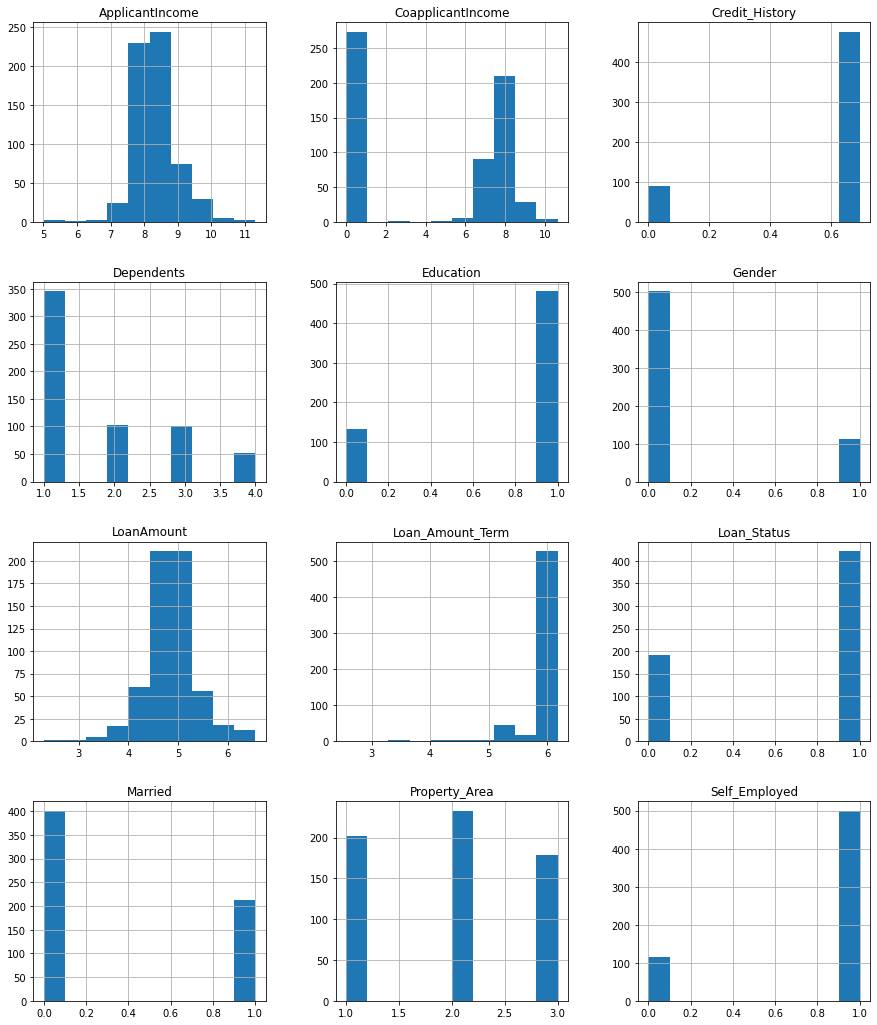

In [34]:
plt.rcParams["figure.figsize"] = 15,18
df_train.hist()

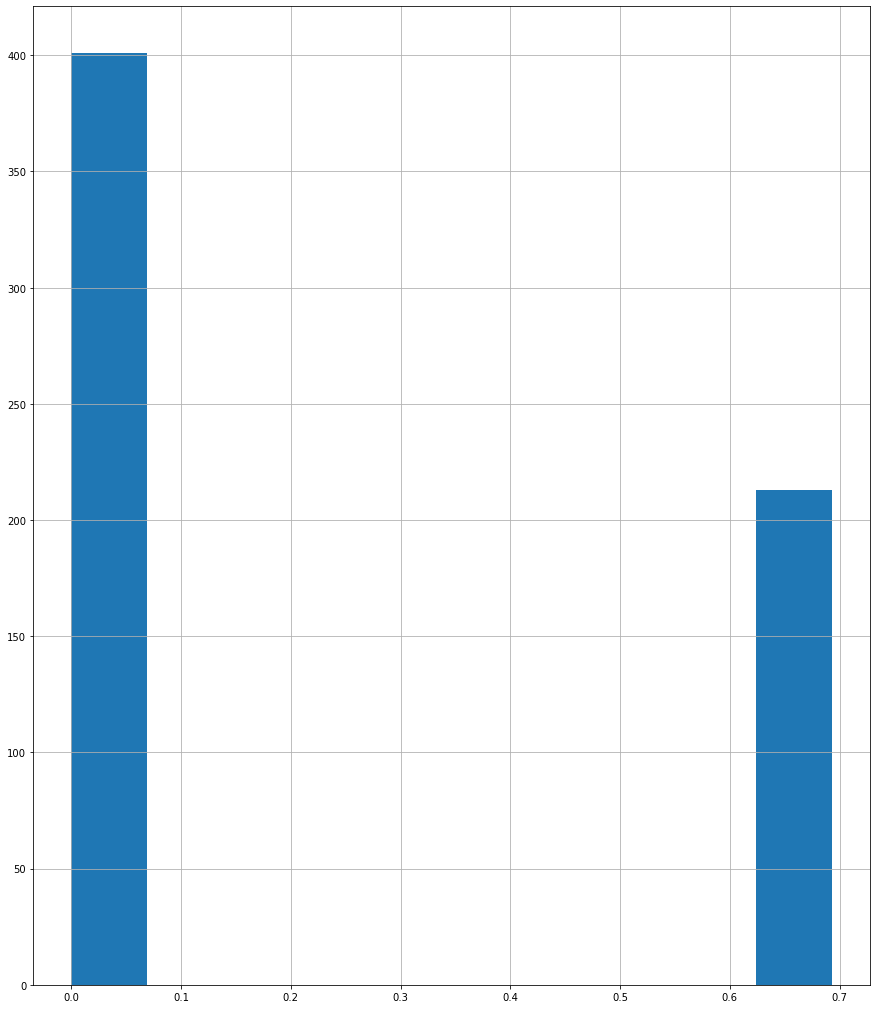

In [36]:
plt.rcParams["figure.figsize"] = 7,5
df_train['Married']= np.log1p(df_train['Married'])
df_train['Married'].hist()

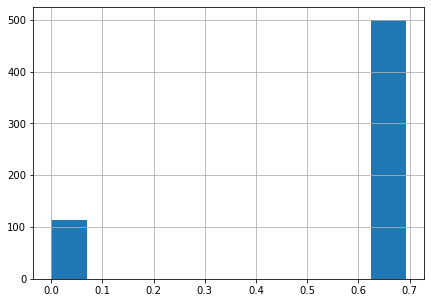

In [39]:
plt.rcParams["figure.figsize"] = 7,5
df_train['Self_Employed']= np.log1p(df_train['Self_Employed'])
df_train['Self_Employed'].hist()

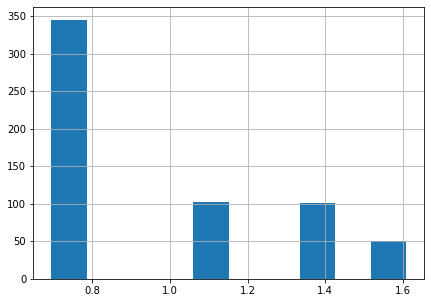

In [42]:
plt.rcParams["figure.figsize"] = 7,5
df_train['Dependents']= np.log1p(df_train['Dependents'])
df_train['Dependents'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227F5564EC8>,
      dtype=object)

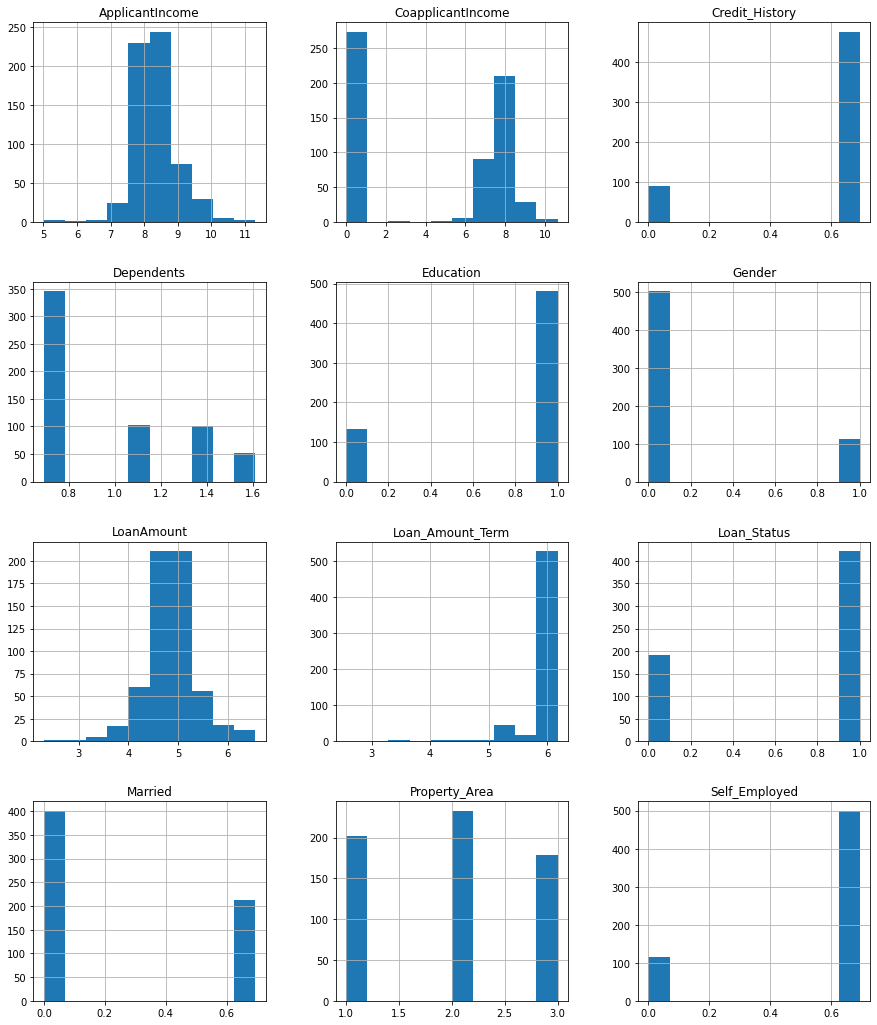

In [44]:
plt.rcParams["figure.figsize"] = 15,18
df_train.hist()

In [45]:
df_train.skew()

Gender               1.648795
Married              0.644850
Dependents           0.729903
Education           -1.367622
Self_Employed       -1.620738
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.150257
Loan_Amount_Term    -4.740479
Credit_History      -1.882361
Property_Area        0.066196
Loan_Status         -0.809998
dtype: float64

In [47]:
x = df_train.drop(['Loan_Status'],axis=1)
y = df_train['Loan_Status']

In [49]:
x['Dependents'] =x['Dependents'].fillna(x['Dependents'].median())
x['Loan_Amount_Term'] =x['Loan_Amount_Term'].fillna(x['Loan_Amount_Term'].median())
x['Credit_History'] =x['Credit_History'].fillna(x['Credit_History'].median())
x['LoanAmount'] =x['LoanAmount'].fillna(x['LoanAmount'].median())
x = x.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
x.head()

In [50]:
x['Loan_Amount_Term'] =x['Loan_Amount_Term'].fillna(x['Loan_Amount_Term'].median())

In [51]:
x['Credit_History'] =x['Credit_History'].fillna(x['Credit_History'].median())

In [52]:
x['LoanAmount'] =x['LoanAmount'].fillna(x['LoanAmount'].median())

In [55]:
x = x.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.000000,1.0,1.0,0.581854,0.000000,0.601711,0.920522,1.0,0.0
1,0.0,0.0,0.442507,1.0,1.0,0.543052,0.688057,0.601711,0.920522,1.0,1.0
2,0.0,0.0,0.000000,1.0,0.0,0.475649,0.000000,0.447563,0.920522,1.0,0.0
3,0.0,0.0,0.000000,0.0,1.0,0.451844,0.730059,0.586647,0.920522,1.0,0.0
4,0.0,1.0,0.000000,1.0,1.0,0.585909,0.000000,0.624304,0.920522,1.0,0.0


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

In [102]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier(class_weight = ({0:100, 1:99929180})))])
pipeline_Nb=Pipeline([('Nb_Gaussion',GaussianNB())])
pipeline_XGb=Pipeline([('XGb_classifier',XGBClassifier())])
pipeline_KN=Pipeline([('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=25))])

In [103]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf,pipeline_Nb,pipeline_XGb,pipeline_KN]

In [104]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'GaussianNB',4:'XGBClassifier',5:'pipeline_KN'}

In [105]:
for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [106]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))
    print(classification_report(y_test,model.predict(x_test)))
    y_pred_new=model.predict(x_test)

Logistic Regression Test Accuracy: 0.8486486486486486
              precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185

Decision Tree Test Accuracy: 0.7243243243243244
              precision    recall  f1-score   support

           0       0.55      0.69      0.61        58
           1       0.84      0.74      0.79       127

    accuracy                           0.72       185
   macro avg       0.69      0.71      0.70       185
weighted avg       0.75      0.72      0.73       185

RandomForest Test Accuracy: 0.8054054054054054
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        58
           1       0.85      0.87      0.86       127

    accuracy                     

In [107]:
y_pred_new

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [65]:
df_test = df_test.drop(['Loan_ID'],axis=1)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227F7F0CA88>,
      dtype=object)

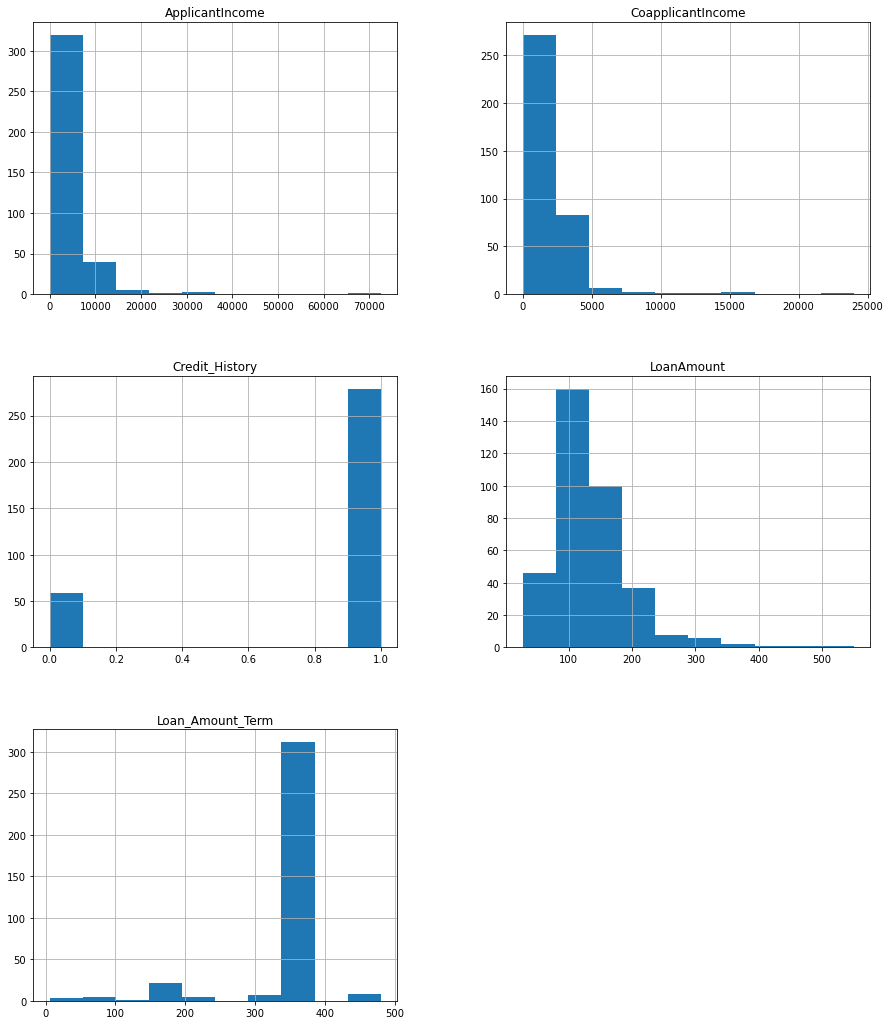

In [66]:
plt.rcParams["figure.figsize"] = 15,18
df_test.hist()

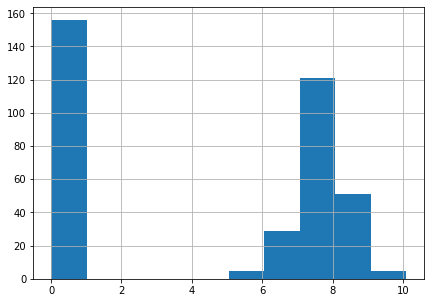

In [67]:
plt.rcParams["figure.figsize"] = 7,5
df_test['CoapplicantIncome'] = np.log1p(df_test['CoapplicantIncome'])
df_test['CoapplicantIncome'].hist()

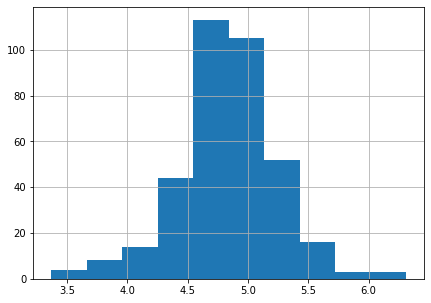

In [68]:
df_test['LoanAmount']= np.log1p(df_test['LoanAmount'])
df_test['LoanAmount'].hist()

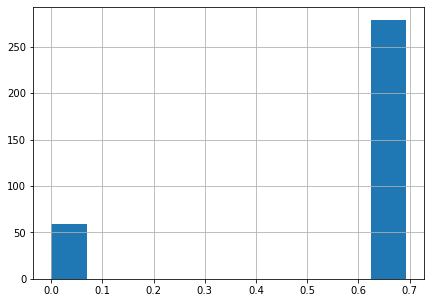

In [69]:
df_test['Credit_History']= np.log1p(df_test['Credit_History'])
df_test['Credit_History'].hist()

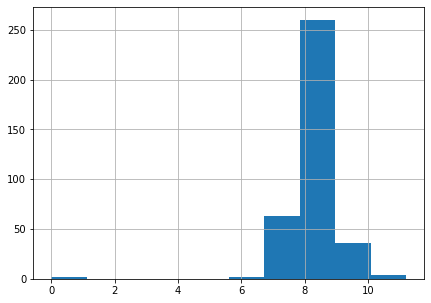

In [70]:
df_test['ApplicantIncome']= np.log1p(df_test['ApplicantIncome'])
df_test['ApplicantIncome'].hist()

In [71]:
df_test['Gender'] = pd.get_dummies(df_test['Gender'])
df_test['Married'] = pd.get_dummies(df_test['Married'])
df_test['Self_Employed'] = pd.get_dummies(df_test['Self_Employed'])

In [72]:
cat_label1 = [var for var in df_test.columns if df_test[var].dtypes == "object"]
cat_label1 = df_test[cat_label1]
cat_label1

,Dependents,Education,Property_Area
0,0,Graduate,Urban
1,1,Graduate,Urban
2,2,Graduate,Urban
3,2,Graduate,Urban
4,0,Not Graduate,Urban
...,...,...,...
362,3+,Not Graduate,Urban
363,0,Graduate,Urban
364,0,Graduate,Semiurban
365,0,Graduate,Rural


In [81]:
df_test['Education'].value_counts()

1    283
0     84
Name: Education, dtype: int64

In [76]:
def encode_Education(Education):
    if Education =="Graduate":
        return 1
    else:
        return 0
    
df_test['Education'] = df_test['Education'].apply(encode_Education)

In [80]:
df_test['Property_Area'].value_counts()

1    140
2    116
3    111
Name: Property_Area, dtype: int64

In [77]:
def encode_Property_Area(Property_Area):
    if Property_Area =="Semiurban":
        return 2
    elif Property_Area =="Urban":
        return 1
    elif Property_Area =="Rural":
        return 3
    
df_test['Property_Area'] = df_test['Property_Area'].apply(encode_Property_Area)

In [79]:
df_test['Dependents'].value_counts()

1.0    200
3.0     59
2.0     58
4.0     40
Name: Dependents, dtype: int64

In [78]:
def encode_Dependents(Dependents):
    if Dependents =='0':
        return 1
    elif Dependents =='1':
        return 2
    elif Dependents =='2':
        return 3
    elif Dependents =='3+':
        return 4
df_test['Dependents'] = df_test['Dependents'].apply(encode_Dependents)

In [82]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,1.0,1,1,8.651899,0.000000,4.709530,360.0,0.693147,1
1,0,0,2.0,1,1,8.031710,7.313887,4.844187,360.0,0.693147,1
2,0,0,3.0,1,1,8.517393,7.496097,5.342334,360.0,0.693147,1
3,0,0,3.0,1,1,7.758333,7.842671,4.615121,360.0,NaN,1
4,0,1,1.0,0,1,8.094684,0.000000,4.369448,360.0,0.693147,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227F7F057C8>,
      dtype=object)

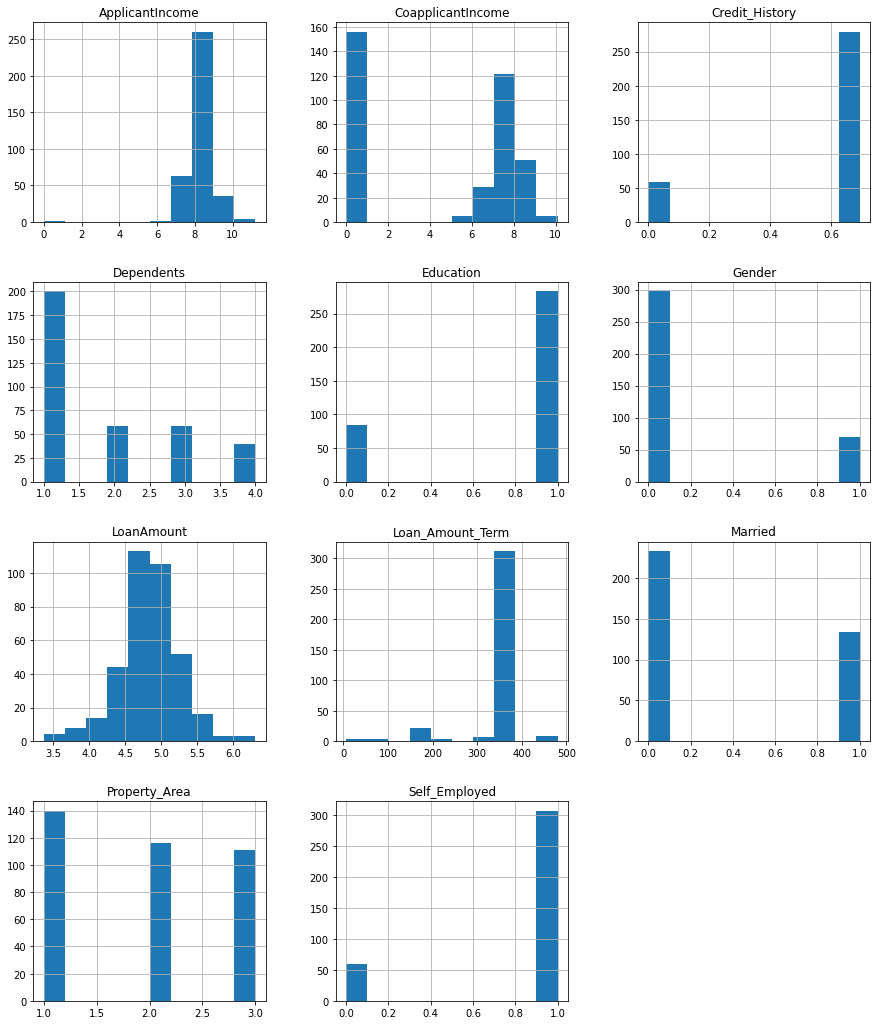

In [84]:
plt.rcParams["figure.figsize"] = 15,18
df_test.hist()

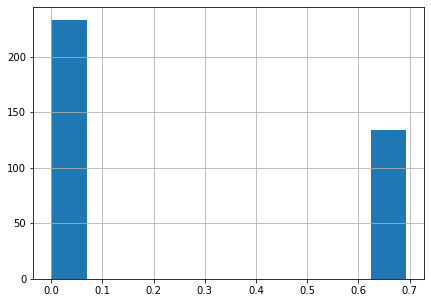

In [85]:
plt.rcParams["figure.figsize"] = 7,5
df_test['Married']= np.log1p(df_test['Married'])
df_test['Married'].hist()

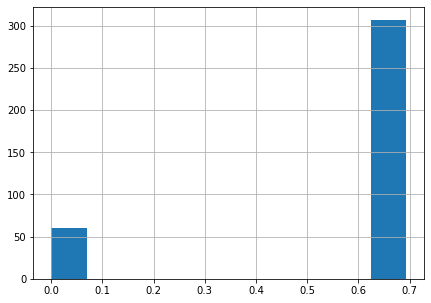

In [86]:
df_test['Self_Employed']= np.log1p(df_test['Self_Employed'])
df_test['Self_Employed'].hist()

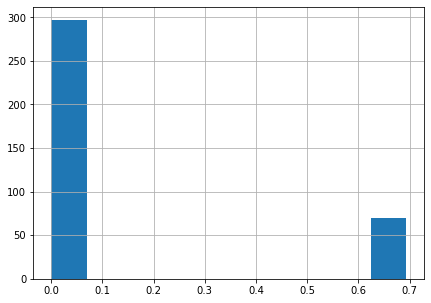

In [87]:
df_test['Gender']= np.log1p(df_test['Gender'])
df_test['Gender'].hist()

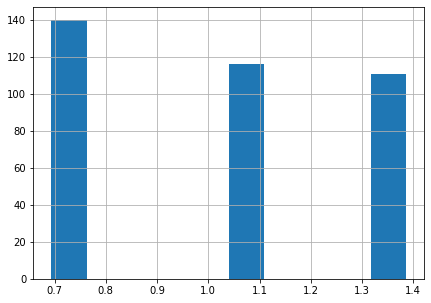

In [88]:
df_test['Property_Area']= np.log1p(df_test['Property_Area'])
df_test['Property_Area'].hist()

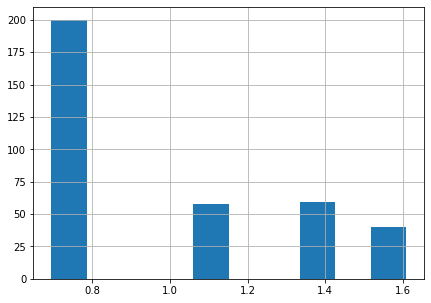

In [89]:
df_test['Dependents']= np.log1p(df_test['Dependents'])
df_test['Dependents'].hist()

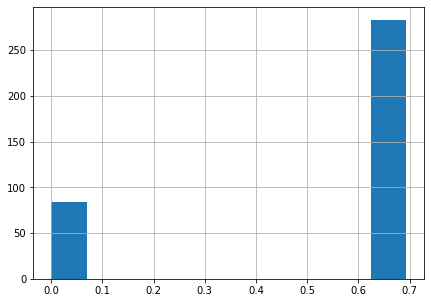

In [90]:
df_test['Education']= np.log1p(df_test['Education'])
df_test['Education'].hist()

In [92]:
df_test.isna().sum()

Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [93]:
df_test['Dependents'] =df_test['Dependents'].fillna(df_test['Dependents'].median())
df_test['Loan_Amount_Term'] =df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].median())
df_test['Credit_History'] =df_test['Credit_History'].fillna(df_test['Credit_History'].median())
df_test['LoanAmount'] =df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())
df_test = df_test.apply(lambda x:(x.astype(float) - min(x))/(max(x)-min(x)), axis = 0)
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.000000,1.0,1.0,0.773060,0.000000,0.455854,0.746835,1.0,0.0
1,0.0,0.0,0.442507,1.0,1.0,0.717645,0.725163,0.501587,0.746835,1.0,0.0
2,0.0,0.0,0.756471,1.0,1.0,0.761042,0.743229,0.670769,0.746835,1.0,0.0
3,0.0,0.0,0.756471,1.0,1.0,0.693219,0.777591,0.423790,0.746835,1.0,0.0
4,0.0,1.0,0.000000,0.0,1.0,0.723272,0.000000,0.340354,0.746835,1.0,0.0


In [123]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 


pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt=Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier(class_weight = ({0:100, 1:99929180})))])
pipeline_Nb=Pipeline([('Nb_Gaussion',GaussianNB())])
pipeline_XGb=Pipeline([('XGb_classifier',XGBClassifier())])
pipeline_KN=Pipeline([('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=25))])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf,pipeline_Nb,pipeline_XGb,pipeline_KN]

best_accuracy=0.0
best_classifier=0
best_pipeline=""
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'GaussianNB',4:'XGBClassifier',5:'pipeline_KN'}

for pipe in pipelines:
    pipe.fit(x,y)
    

for i,model in enumerate(pipelines):
    y_pred_new1=model.predict(df_test)

In [124]:
y_pred_new1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [125]:
y_pred_new1 = pd.DataFrame(y_pred_new1)
y_pred_new1 = y_pred_new1.rename(columns={0:'Loan_Status'})

In [126]:
def encode_Loan_Status(Loan_Status):
    if Loan_Status ==1:
        return "y"
    else:
        return "N"
    
y_pred_new1['Loan_Status'] = y_pred_new1['Loan_Status'].apply(encode_Loan_Status)

In [127]:
y_pred_new1

,Loan_Status
0,y
1,y
2,y
3,y
4,y
...,...
362,y
363,y
364,y
365,y


In [128]:
y_pred_new1['Loan_Status'].value_counts()

y    309
N     58
Name: Loan_Status, dtype: int64

In [95]:
x_train.shape,x_test.shape

((429, 11), (185, 11))

In [96]:
x.shape,df_test.shape

((614, 11), (367, 11))

In [129]:
df = pd.read_csv("E:\LOAN_PRED_HACK_TEST.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [130]:
df = df[['Loan_ID']]
df['Loan_Status'] = y_pred_new1['Loan_Status']
df

,Loan_ID,Loan_Status
0,LP001015,y
1,LP001022,y
2,LP001031,y
3,LP001035,y
4,LP001051,y
...,...,...
362,LP002971,y
363,LP002975,y
364,LP002980,y
365,LP002986,y


In [132]:
df.to_csv('sample_submission.csv',index=False)